In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from numpy import array
import string
import matplotlib.gridspec as gridspec

In [2]:
filename="s.conjugate_points_data"
f=open(filename,"r")
PQ1=[]
PQ2=[]
PQ3=[]
SOLL=[]
SOL=[]
DDX=[]
QQ=[]
Lengths=[]
    
ii=0
BR=1
dX1=[]
dY1=[]
dZ1=[]
Pq1=[]
Pq2=[]
Pq3=[]
BP=[]
LP=[]
DX=[]
DX1=[]
DY1=[]

Q=[]
DDY1=[]
DDDY1=[]
SOLL=[]
No=int(98/7) + 1
while(1):
    dalf=[]
    Dt=[]
    A=f.readline();
    #print A
    if A=='':
        break
    K=A.split()
    if K==[]:
        break
    Sol=[]
    for i in range(0,int(K[8])-1):
        #print i
        B=f.readline();
        Bb=B.split();
        Bb=np.array(Bb);
        Bb=Bb.astype(float);
        dy1=[]
        if ((i%No ==0) and (i != 0) and  i <= (int(K[6])*No)):
            s=Sol[0]
            q1=Sol[4]
            q2=Sol[5]
            q3=Sol[6]
            q4=Sol[7]
            nor=q1*q1 + q2*q2 + q3*q3 + q4*q4
            q=[s,q1,q2,q3,q4,nor]     
            for m in range(0,6):
                for i2 in range(1,8):
                    dy1.append(Sol[14+14*m+i2])        
                DY1.append(dy1)
                dy1=[]  
            DDY1.append(DY1)
            Q.append(q)    
            SOL.append(Sol)
            Sol=[]
            DX=[]
            DY1=[]
        
        Sol=np.concatenate([Sol,Bb])
  
    B=f.readline()
    B=B.split()
    L1=float(B[2])
    Lengths.append([L1])
    DX1.append(L1)  #Single overlap
    DDDY1.append(DDY1)
    
    QQ.append(Q)                               
    SOLL.append(SOL)

    DDY1=[]
    Q=[]                                               
print("Successfully Loaded solutions");
########################################
#The solutions are loaded from the given data files

Successfully Loaded solutions


In [3]:
#########################################
#Compute the determinant of the "Stability Matrix"
DT=[]
DT1=[]
DET=[]
DET1=[]
St=[]
St1=[]
QQ[0][1];
for i in range(0,len(DDDY1)):
    for j in range(0,len(DDDY1[i])):
        q1=QQ[i][j][1]
        q2=QQ[i][j][2]
        q3=QQ[i][j][3]
        q4=QQ[i][j][4]
        Pr=[[1.0,0,0,0,0,0,0],[0,1.0,0,0,0,0,0],[0,0,1.0,0,0,0,0],[0,0,0,q4,q3,-q2,-q1],[0,0,0,-q3,q4,q1,-q2],[0,0,0,q2,-q1,q4,-q3]] 
        PM1=np.dot(DDDY1[i][j],np.transpose(Pr)) #Stability Matrix
        Det1=np.linalg.det(PM1)
        DET1.append([(Lengths[i][0]*QQ[i][j][0]),Det1]) #Arclength 

    DT1.append(DET1) #Determinant of the "Stability Matrix"
    DET1=[]
print("Successful Computation!!!")

Successful Computation!!!


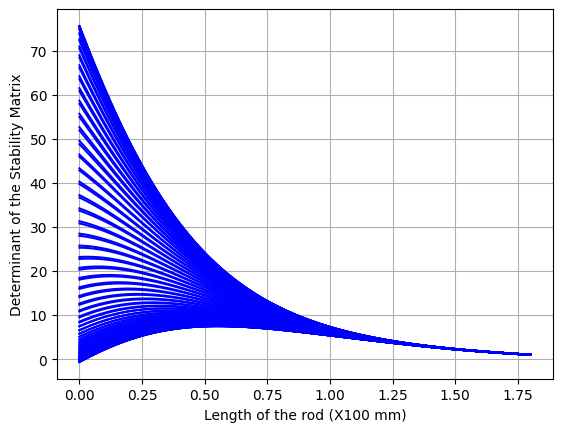

In [4]:
##Plot of Conjugate point determination for all the solutions with a spacing
for k in range(0,len(DT1),5):
    plotxx=[]
    plotyy=[]
    for i in range(0,len(DT1[k])):
        plotxx.append(DT1[k][i][0])
        plotyy.append(DT1[k][i][1])
    
    plt.plot(plotxx,plotyy,'b')
    plt.xlabel('Length of the rod (X100 mm)')
    plt.ylabel('Determinant of the Stability Matrix')
    
plt.grid()
plt.show()

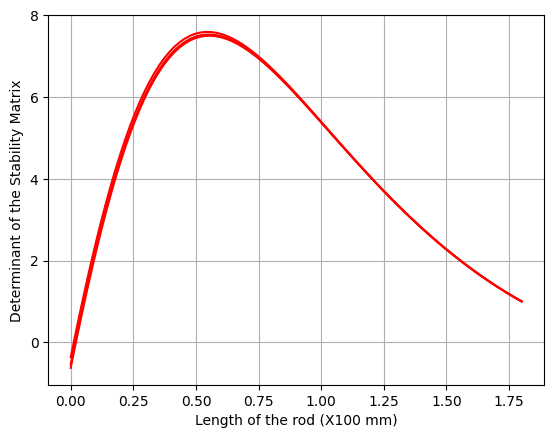

In [5]:
##Plot of Conjugate point determination for selected band of solutions 
for k in range(263,285,10):
    plotxx=[]
    plotyy=[]
    for i in range(0,len(DT1[k])):
        plotxx.append(DT1[k][i][0])
        plotyy.append(DT1[k][i][1])
    plt.plot(plotxx,plotyy,'r')
plt.xlabel('Length of the rod (X100 mm)')
plt.ylabel('Determinant of the Stability Matrix')
plt.grid()
plt.show()